=== CHỌN PHƯƠNG PHÁP BIẾN ĐỔI ẢNH ===
I: Inverse Transformation
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching
Q: Quit
✅ Đã lưu: output_cau1/ha_long_gamma.jpg
✅ Đã lưu: output_cau1/pagoda_gamma.jpg
✅ Đã lưu: output_cau1/quang_ninh_gamma.jpg


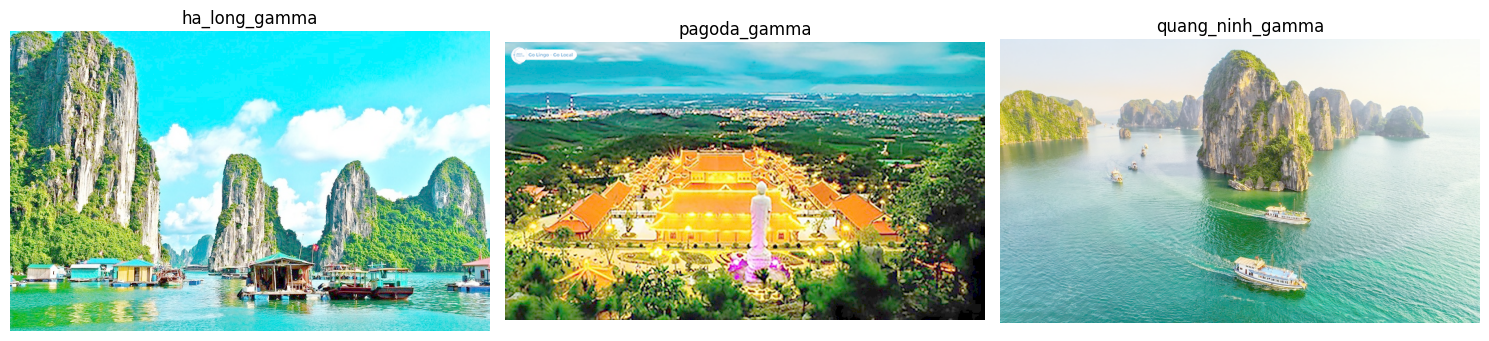

✅ Đã lưu: output_cau1/ha_long_inverse.jpg
✅ Đã lưu: output_cau1/pagoda_inverse.jpg
✅ Đã lưu: output_cau1/quang_ninh_inverse.jpg


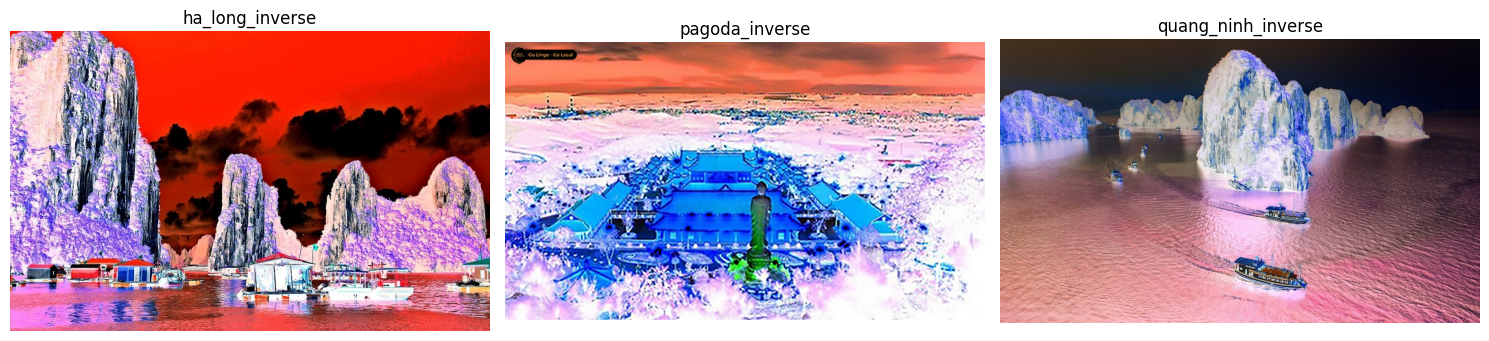

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\4176315593.py:39: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\4176315593.py:39: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\4176315593.py:40: RuntimeWarning: divide by zero encountered in log
  return np.uint8(c * np.log(1 + img))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\4176315593.py:40: RuntimeWarning: invalid value encountered in multiply
  return np.uint8(c * np.log(1 + img))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\4176315593.py:40: RuntimeWarning: invalid value encountered in cast
  return np.uint8(c * np.log(1 + img))


✅ Đã lưu: output_cau1/ha_long_log.jpg
✅ Đã lưu: output_cau1/pagoda_log.jpg
✅ Đã lưu: output_cau1/quang_ninh_log.jpg


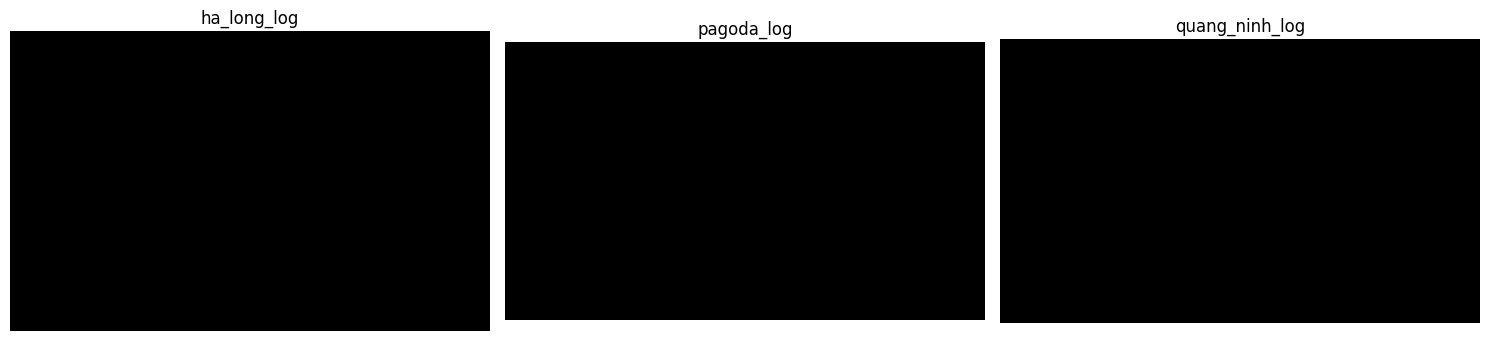

✅ Đã lưu: output_cau1/ha_long_log.jpg
✅ Đã lưu: output_cau1/pagoda_log.jpg
✅ Đã lưu: output_cau1/quang_ninh_log.jpg


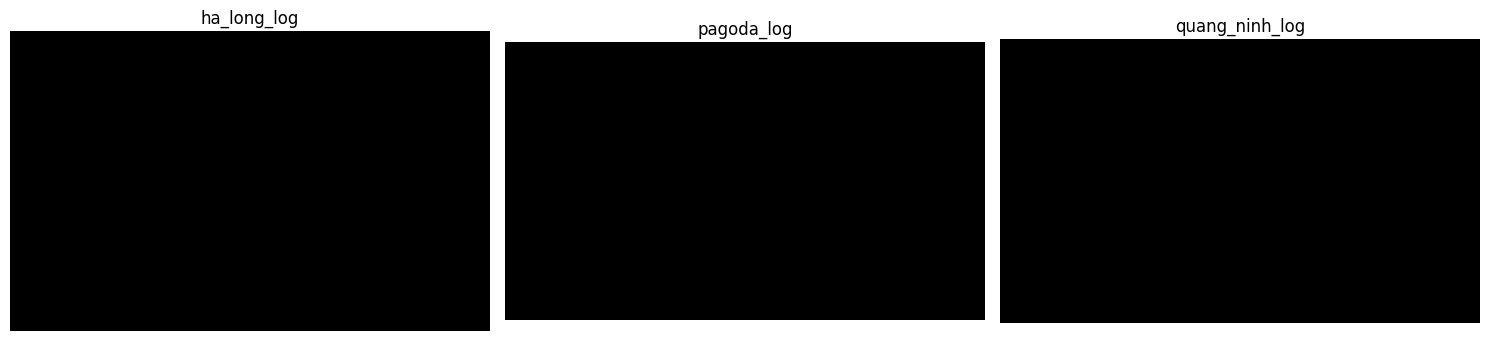

✅ Đã lưu: output_cau1/ha_long_log.jpg
✅ Đã lưu: output_cau1/pagoda_log.jpg
✅ Đã lưu: output_cau1/quang_ninh_log.jpg


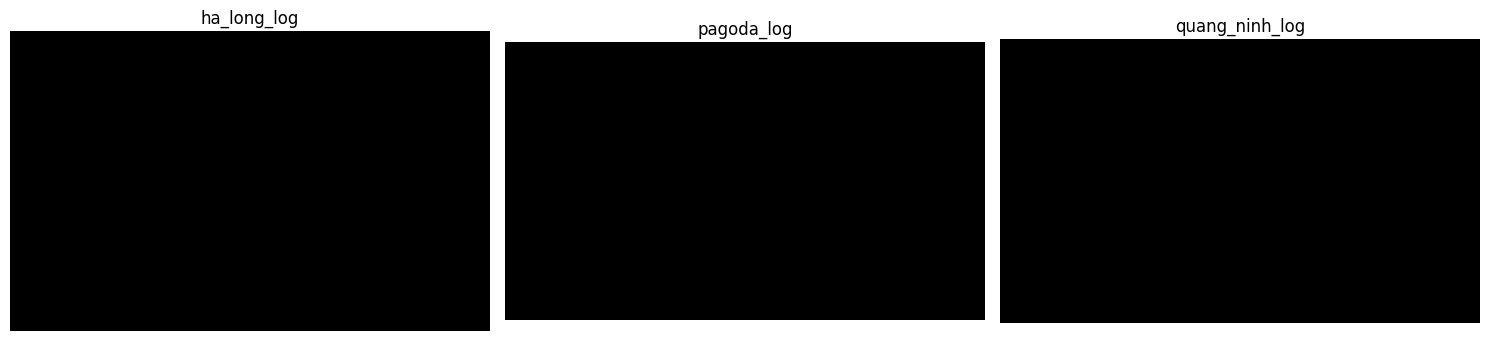

✅ Đã lưu: output_cau1/ha_long_contrast.jpg
✅ Đã lưu: output_cau1/pagoda_contrast.jpg
✅ Đã lưu: output_cau1/quang_ninh_contrast.jpg


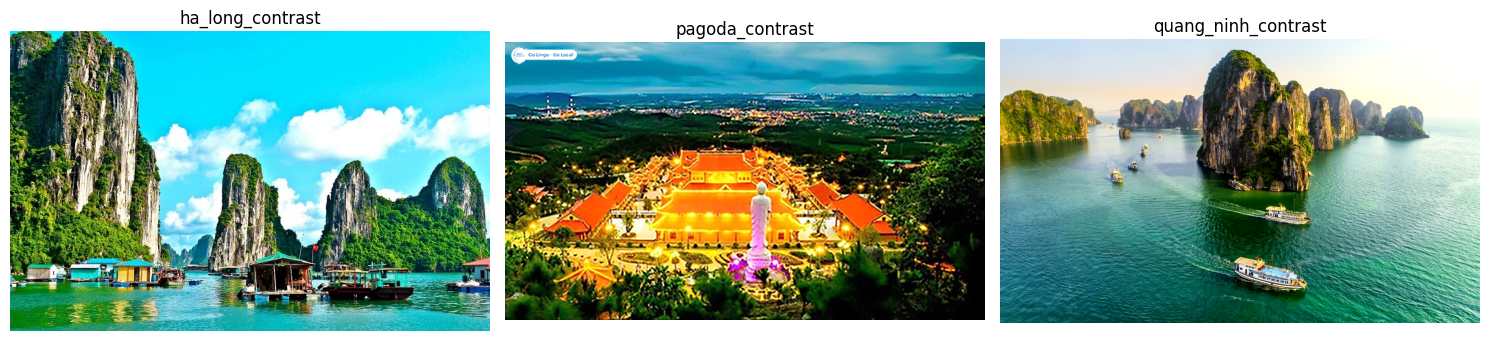

👋 Thoát chương trình.


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Thư mục lưu ảnh kết quả
output_dir = "output_cau1"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Danh sách ảnh
input_folder = 'exercise'

# Đọc ảnh từ file
def read_images():
    loaded_images = {}
    for name, path in input_folder.items():
        img = cv2.imread(path)
        if img is not None:
            loaded_images[name] = img
        else:
            print(f"❌ Không đọc được ảnh: {path}")
    return loaded_images

# Các hàm xử lý ảnh
def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    normalized = img / 255.0
    corrected = np.power(normalized, 1 / gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
 
    if len(img.shape) == 3:  
        img = img.astype(np.float32) + 1  
        result = np.zeros_like(img, dtype=np.float32)

        for i in range(3):  # xử lý từng kênh B, G, R
            log_channel = np.log(img[:, :, i])
            log_channel = (255 / np.log(1 + np.max(img[:, :, i]))) * log_channel
            result[:, :, i] = log_channel

        return np.clip(result, 0, 255).astype(np.uint8)

    else:  
        img = img.astype(np.float32) + 1
        log_img = np.log(img)
        log_img = (255 / np.log(1 + np.max(img))) * log_img
        return np.clip(log_img, 0, 255).astype(np.uint8)



def histogram_equalization(img):
    if len(img.shape) == 2:  # grayscale
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    in_min = np.percentile(img, 5)
    in_max = np.percentile(img, 95)
    stretched = (img - in_min) * (255.0 / (in_max - in_min))
    return np.clip(stretched, 0, 255).astype(np.uint8)

# Hiển thị nhiều ảnh sau khi biến đổi
def show_images(results):
    total = len(results)
    cols = 3
    rows = (total + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))

    for idx, (title, img) in enumerate(results.items()):
        plt.subplot(rows, cols, idx + 1)
        if len(img.shape) == 2:  # Grayscale
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Xử lý ảnh theo lựa chọn
def process_images(choice):
    funcs = {
        'I': (inverse_transform, "inverse"),
        'G': (gamma_correction, "gamma"),
        'L': (log_transform, "log"),
        'H': (histogram_equalization, "histeq"),
        'C': (contrast_stretching, "contrast")
    }

    func, suffix = funcs.get(choice.upper(), (None, None))
    if not func:
        print("⚠️ Lựa chọn không hợp lệ.")
        return

    imgs = read_images()
    results = {}

    for name, img in imgs.items():
        result = func(img)
        filename = f"{output_dir}/{name}_{suffix}.jpg"
        cv2.imwrite(filename, result)
        print(f"✅ Đã lưu: {filename}")
        results[f"{name}_{suffix}"] = result

    # Hiển thị tất cả ảnh đã xử lý
    show_images(results)

# MENU chính
def main():
    print("=== CHỌN PHƯƠNG PHÁP BIẾN ĐỔI ẢNH ===")
    print("I: Inverse Transformation")
    print("G: Gamma Correction")
    print("L: Log Transformation")
    print("H: Histogram Equalization")
    print("C: Contrast Stretching")
    print("Q: Quit")

    while True:
        key = input("Nhập lựa chọn của bạn (I/G/L/H/C/Q): ").upper()
        if key == 'Q':
            print("Thoát chương trình.")
            break
        process_images(key)

# Bắt đầu chạy chương trình
if __name__ == "__main__":
    main()



=== MENU XỬ LÝ ẢNH (FFT & BUTTERWORTH) ===
F : Fast Fourier Transform (magnitude spectrum)
L : Butterworth Low-pass Filter
H : Butterworth High-pass Filter
Q : Quit
-------------------------------------------

✅ Đã lưu: output_cau2\ha_long_fft.jpg
✅ Đã lưu: output_cau2\pagoda_fft.jpg
✅ Đã lưu: output_cau2\quang_ninh_fft.jpg


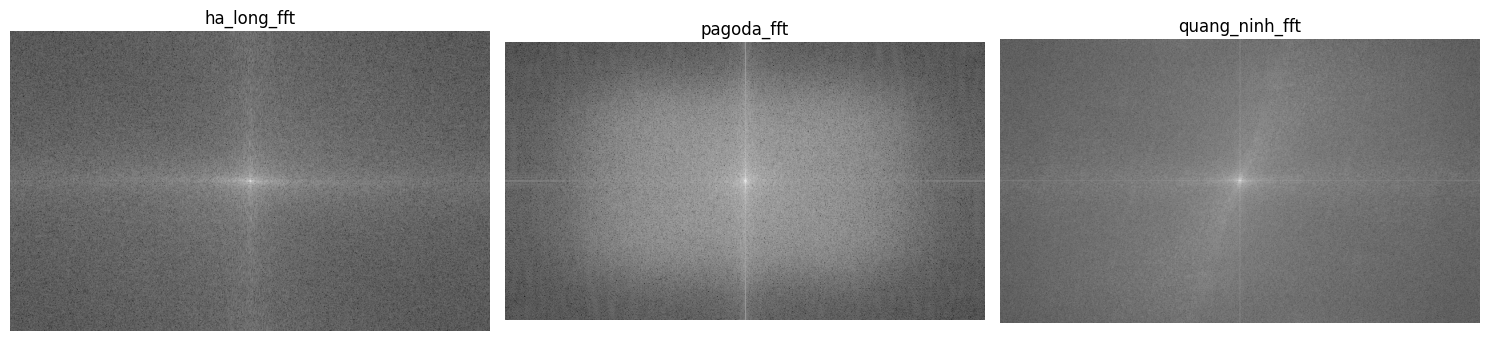


=== MENU XỬ LÝ ẢNH (FFT & BUTTERWORTH) ===
F : Fast Fourier Transform (magnitude spectrum)
L : Butterworth Low-pass Filter
H : Butterworth High-pass Filter
Q : Quit
-------------------------------------------

✅ Đã lưu: output_cau2\ha_long_butter_low.jpg
✅ Đã lưu: output_cau2\pagoda_butter_low.jpg
✅ Đã lưu: output_cau2\quang_ninh_butter_low.jpg


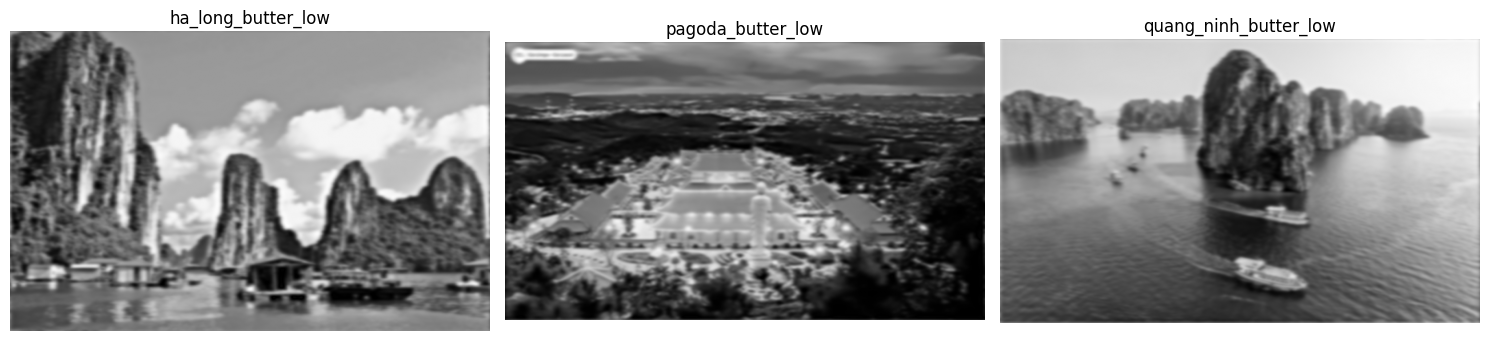


=== MENU XỬ LÝ ẢNH (FFT & BUTTERWORTH) ===
F : Fast Fourier Transform (magnitude spectrum)
L : Butterworth Low-pass Filter
H : Butterworth High-pass Filter
Q : Quit
-------------------------------------------

✅ Đã lưu: output_cau2\ha_long_butter_high.jpg
✅ Đã lưu: output_cau2\pagoda_butter_high.jpg
✅ Đã lưu: output_cau2\quang_ninh_butter_high.jpg


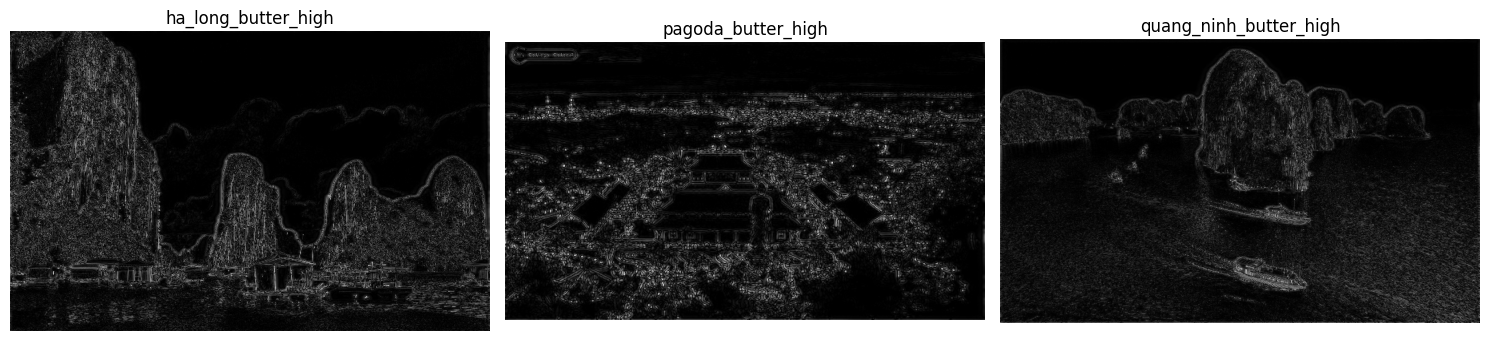


=== MENU XỬ LÝ ẢNH (FFT & BUTTERWORTH) ===
F : Fast Fourier Transform (magnitude spectrum)
L : Butterworth Low-pass Filter
H : Butterworth High-pass Filter
Q : Quit
-------------------------------------------

🚪 Thoát chương trình.


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


input_folder = 'exercise'
OUTPUT_DIR = "output_cau2"
D0 = 50        
N  = 2        


os.makedirs(OUTPUT_DIR, exist_ok=True)

# 👉 Lưu ảnh nhưng không show từng cái một
def save_only(title, img):
    path = os.path.join(OUTPUT_DIR, f"{title}.jpg")
    cv2.imwrite(path, img)
    print(f"✅ Đã lưu: {path}")

# 👇 BỔ SUNG: Hàm show toàn bộ ảnh bằng matplotlib
def show_images(results):
    total = len(results)
    cols = 3
    rows = (total + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for idx, (title, img) in enumerate(results.items()):
        plt.subplot(rows, cols, idx + 1)
        cmap = 'gray' if len(img.shape) == 2 else None
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# FFT magnitude spectrum
def fft_magnitude(gray):
    f   = np.fft.fft2(gray)
    fsh = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fsh) + 1)
    mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    return mag.astype(np.uint8)

# Butterworth mask
def butterworth_mask(shape, D0, n, highpass=False):
    rows, cols = shape
    u = np.arange(rows) - rows/2
    v = np.arange(cols) - cols/2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0)**(2 * n))
    if highpass:
        H = 1 - H
    return H

def butterworth_filter(gray, D0, n, highpass=False):
    f   = np.fft.fft2(gray)
    fsh = np.fft.fftshift(f)
    H   = butterworth_mask(gray.shape, D0, n, highpass)
    G   = fsh * H
    ish = np.fft.ifftshift(G)
    g   = np.fft.ifft2(ish)
    g   = np.abs(g)
    g   = cv2.normalize(g, None, 0, 255, cv2.NORM_MINMAX)
    return g.astype(np.uint8)


def process_all(func, suffix):
    results = {}
    for name, file in input_folder.items():
        img  = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️  Không tìm thấy {file}")
            continue
        result = func(img)
        title = f"{name}_{suffix}"
        save_only(title, result)
        results[title] = result
    show_images(results)

# MENU
def main():
    menu = """
=== MENU XỬ LÝ ẢNH (FFT & BUTTERWORTH) ===
F : Fast Fourier Transform (magnitude spectrum)
L : Butterworth Low-pass Filter
H : Butterworth High-pass Filter
Q : Quit
-------------------------------------------
"""
    while True:
        print(menu)
        key = input("Nhập lựa chọn (F/L/H/Q): ").strip().upper()
        if key == 'Q':
            print("🚪 Thoát chương trình.")
            break
        elif key == 'F':
            process_all(fft_magnitude, "fft")
        elif key == 'L':
            process_all(lambda img: butterworth_filter(img, D0, N, highpass=False), "butter_low")
        elif key == 'H':
            process_all(lambda img: butterworth_filter(img, D0, N, highpass=True),  "butter_high")
        else:
            print("❌ Lựa chọn không hợp lệ, thử lại nha!")

if __name__ == "__main__":
    main()


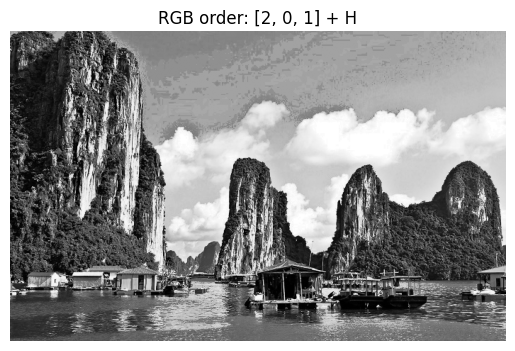

✅ Đã lưu: ha-long-bay-in-vietnam_RGB201_H.jpg


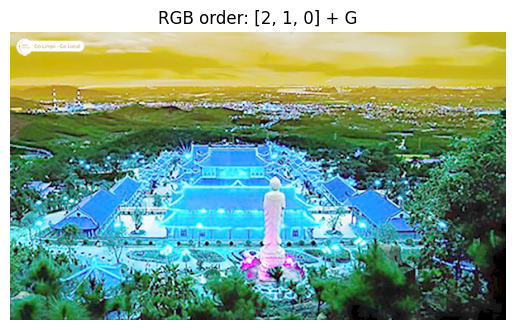

✅ Đã lưu: pagoda_RGB210_G.jpg


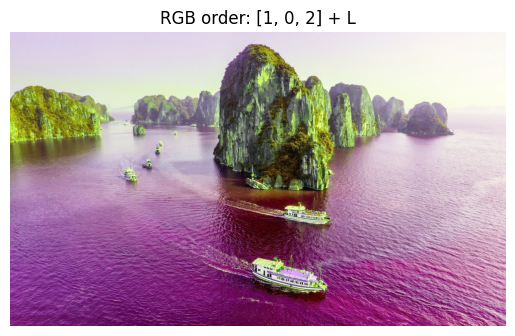

✅ Đã lưu: quang_ninh_RGB102_L.jpg


In [14]:
import os
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
import random

input_folder = 'exercise'
output_folder = 'output_cau3'
os.makedirs(output_folder, exist_ok=True)

def random_rgb_swap(img):
    channels = [0, 1, 2]
    random.shuffle(channels)
    swapped = img[:, :, channels]
    return swapped, channels

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_float = img_as_float(img)
    corrected = np.power(img_float, 1 / gamma)
    return img_as_ubyte(corrected)

def log_transform(img):
    img_float = img_as_float(img)
    log_img = np.log1p(img_float)
    log_img /= np.max(log_img)
    return img_as_ubyte(log_img)

def histogram_equalization(img):
    if len(img.shape) == 3:
        img = np.mean(img, axis=2).astype(np.uint8)
    return img_as_ubyte(exposure.equalize_hist(img))

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    return rescale_intensity(img, in_range=(p2, p98))

transformations = {
    'I': inverse_image,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = iio.imread(img_path)

        img_swapped, channel_order = random_rgb_swap(img)

        transform_key = random.choice(list(transformations.keys()))
        transformed = transformations[transform_key](img_swapped)

        plt.imshow(transformed, cmap='gray' if len(transformed.shape)==2 else None)
        plt.title(f"RGB order: {channel_order} + {transform_key}")
        plt.axis('off')
        plt.show()

        new_name = f"{os.path.splitext(filename)[0]}_RGB{''.join(map(str, channel_order))}_{transform_key}.jpg"
        iio.imwrite(os.path.join(output_folder, new_name), transformed)
        print(f"✅ Đã lưu: {new_name}")

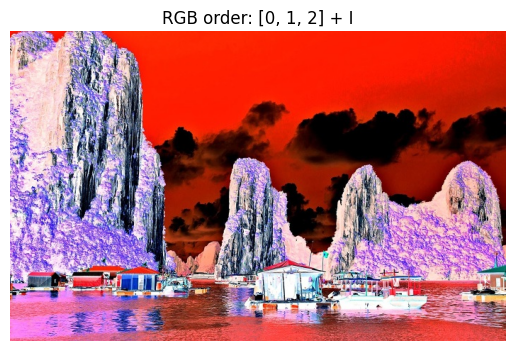

Đã lưu: ha-long-bay-in-vietnam_RGB012_I.jpg


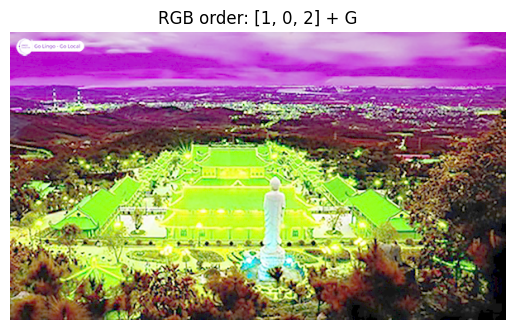

Đã lưu: pagoda_RGB102_G.jpg


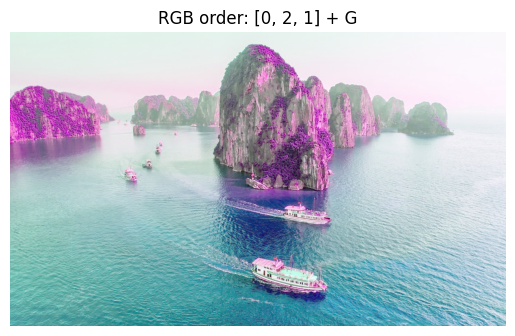

Đã lưu: quang_ninh_RGB021_G.jpg


In [3]:
import os
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte, img_as_float, color
from skimage.exposure import rescale_intensity
from scipy.ndimage import minimum_filter, maximum_filter
import random

input_folder = 'exercise'
output_folder = 'output_cau4'
os.makedirs(output_folder, exist_ok=True)

def random_rgb_swap(img):
    order = [0, 1, 2]
    random.shuffle(order)
    return img[:, :, order], order

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_float = img_as_float(img)
    corrected = np.power(img_float, 1 / gamma)
    return img_as_ubyte(corrected)

def log_transform(img):
    img_float = img_as_float(img)
    log_img = np.log1p(img_float)
    log_img /= np.max(log_img)
    return img_as_ubyte(log_img)

def histogram_equalization(img):
    if img.ndim == 3:
        img = color.rgb2gray(img)
    eq = exposure.equalize_hist(img)
    return img_as_ubyte(eq)

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    return img_as_ubyte(rescale_intensity(img, in_range=(p2, p98)))

def butterworth_filter(img_gray, d0=30, n=2, highpass=False):
    img_float = img_as_float(img_gray)
    f = np.fft.fft2(img_float)
    fshift = np.fft.fftshift(f)

    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D = np.sqrt((u - ccol)**2 + (v - crow)**2)

    if highpass:
        H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    else:
        H = 1 / (1 + (D / d0)**(2 * n))

    G = fshift * H
    ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(ishift)
    return img_as_ubyte(np.abs(img_back))

def apply_min_filter(img, size=3):
    return minimum_filter(img, size=size)

def apply_max_filter(img, size=3):
    return maximum_filter(img, size=size)

transformations = {
    'I': inverse_image,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching,
    'BL': lambda img: butterworth_filter(color.rgb2gray(img), highpass=False),
    'BH': lambda img: butterworth_filter(color.rgb2gray(img), highpass=True)
}

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = iio.imread(img_path)

        img_rgb, rgb_order = random_rgb_swap(img)

        transform_key = random.choice(list(transformations.keys()))
        transformed = transformations[transform_key](img_rgb)

        if transform_key == 'BL':
            transformed = apply_min_filter(transformed)
        elif transform_key == 'BH':
            transformed = apply_max_filter(transformed)

        plt.imshow(transformed, cmap='gray' if transformed.ndim == 2 else None)
        plt.title(f"RGB order: {rgb_order} + {transform_key}")
        plt.axis('off')
        plt.show()
        output_name = f"{os.path.splitext(filename)[0]}_RGB{''.join(map(str, rgb_order))}_{transform_key}.jpg"
        output_path = os.path.join(output_folder, output_name)
        iio.imwrite(output_path, transformed)
        print(f"Đã lưu: {output_name}")

